# Light GBM Random Forest - Low Depth with Proper Encoding
As part of the overall stacking model, I will develop two Random Forest (RF) models: one with a relative low depth, and one with a high depth. I define low depth as `max_depth = 5` and high depth as `max_depth = 15`. With the depth defined, I tune the remaining parameters sequentially.  
  
In this notebook, I set out to optimise a **low depth RF model** using the LightGBM package. The optimisation sequence was as follows:  
  
1. No. of Trees (2,500)
2. RFECV (36)
3. Max Features (1/3 or 12)
4. Subsampling (0.90)
5. Min Samples in Leaf (10)
6. L1 Regularisation (0.6)
7. L2 Regularisation (0.1)
  
The final CV score was **83.02%**.

In [1]:
# Import modules
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.feature_selection import RFECV, RFE
from sklearn.metrics import accuracy_score, auc, make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RepeatedKFold, KFold, RepeatedStratifiedKFold, StratifiedKFold
from lightgbm import LGBMClassifier
import kaggle_titanic as kt
import warnings

# Settings
%matplotlib inline
matplotlib.style.use('ggplot')
warnings.filterwarnings('ignore')

## Prepare Data

In [2]:
# Import data
df = pd.read_csv('train.csv')

# Clean data
df = kt.clean_all(df)

# Encode data (only for RFECV purposes)
df_encoded, _ = kt.encode_train(df)

## Global Settings

In [3]:
# Create fold indices
meta_folds = kt.get_folds(df=df, random_state=123)

## Nested CV

In [4]:
# Initialise results
all_results = []

# Parameter tuning
# 1. No. of trees
param_estimators = {
    'n_estimators': [10, 25, 50, 75, 100, 250, 500, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 6000]
}

# 2. Max features
# In loop

# 3. Subsampling
param_subsample = {
    'subsample': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
}

# 4. Min. Samples in leaf
param_min_child_samples = {
    'min_child_samples': [1,5,10,20,30,40,50]
}

# 5. L1 Regularisation
param_alpha = {
    'reg_alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

# 5. L2 Regularisation
param_lambda = {
    'reg_lambda': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

* ------------------------------------------- *
| FULL MODEL VALIDATION - NESTED CV - FOLD 01 |
* ------------------------------------------- *


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:  1.4min finished


   Best Score: 0.8005336088344778
Optimal Value: 47


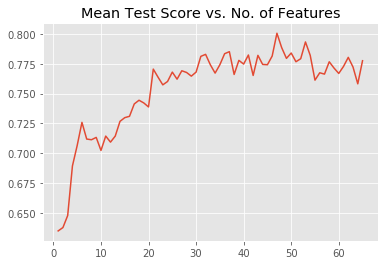

['pclass_OC', 'sex_BN', 'sibsp_NM', 'sibsp_OC', 'parch_NM', 'parch_OC', 'fare_NM', 'fare_OC', 'age_OC', 'age_NM', 'pclass_ME', 'title_ME', 'age_ME', 'sibsp_ME', 'ticlen_ME', 'fare_ME', 'cabletter_ME', 'cabno_ME', 'embarked_ME', 'pclass_OH_CLASS1', 'pclass_OH_CLASS2', 'pclass_OH_CLASS3', 'title_OH_Master.', 'title_OH_Miss.', 'title_OH_Mr.', 'title_OH_Other', 'sex_OH_female', 'sex_OH_male', 'sibsp_OH_None', 'parch_OH_None', 'ticlen_OH_L4', 'ticlen_OH_L5', 'ticlen_OH_L6', 'ticlen_OH_LO', 'fare_OH_G3', 'fare_OH_G4', 'fare_OH_G5', 'cabletter_OH_B/D/E', 'cabletter_OH_NIL', 'cabletter_OH_Others', 'cabno_OH_C1', 'cabno_OH_NIL', 'embarked_OH_C', 'embarked_OH_Q', 'embarked_OH_S', 'age_OH_A0', 'age_OH_A6']
Computing test scores for n_estimators = 10...Done!
Computing test scores for n_estimators = 25...Done!
Computing test scores for n_estimators = 50...Done!
Computing test scores for n_estimators = 75...Done!
Computing test scores for n_estimators = 100...Done!
Computing test scores for n_estima

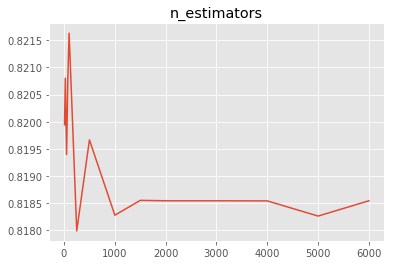

Computing test scores for colsample_bytree = 0.0425531914893617...Done!
Computing test scores for colsample_bytree = 0.06382978723404255...Done!
Computing test scores for colsample_bytree = 0.08510638297872339...Done!
Computing test scores for colsample_bytree = 0.10638297872340424...Done!
Computing test scores for colsample_bytree = 0.1276595744680851...Done!
Computing test scores for colsample_bytree = 0.14893617021276595...Done!
Computing test scores for colsample_bytree = 0.17021276595744678...Done!
Computing test scores for colsample_bytree = 0.19148936170212763...Done!
Computing test scores for colsample_bytree = 0.21276595744680848...Done!
Computing test scores for colsample_bytree = 0.23404255319148934...Done!
Computing test scores for colsample_bytree = 0.2553191489361702...Done!
Computing test scores for colsample_bytree = 0.276595744680851...Done!
Computing test scores for colsample_bytree = 0.29787234042553185...Done!
Computing test scores for colsample_bytree = 0.319148936

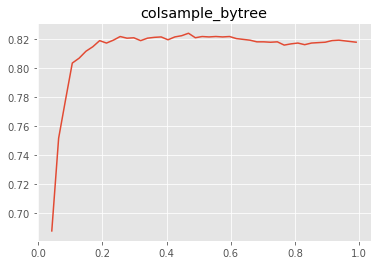

Computing test scores for subsample = 0.3...Done!
Computing test scores for subsample = 0.4...Done!
Computing test scores for subsample = 0.5...Done!
Computing test scores for subsample = 0.6...Done!
Computing test scores for subsample = 0.7...Done!
Computing test scores for subsample = 0.8...Done!
Computing test scores for subsample = 0.9...Done!
Computing test scores for subsample = 0.99...Done!


[ RESULTS ]
   Best Score: 0.8294993129934695
Optimal Value: 0.99


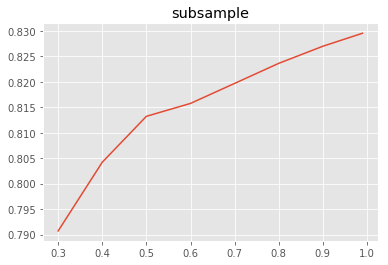

Computing test scores for min_child_samples = 1...Done!
Computing test scores for min_child_samples = 5...Done!
Computing test scores for min_child_samples = 10...Done!
Computing test scores for min_child_samples = 20...Done!
Computing test scores for min_child_samples = 30...Done!
Computing test scores for min_child_samples = 40...Done!
Computing test scores for min_child_samples = 50...Done!


[ RESULTS ]
   Best Score: 0.8294993129934695
Optimal Value: 20


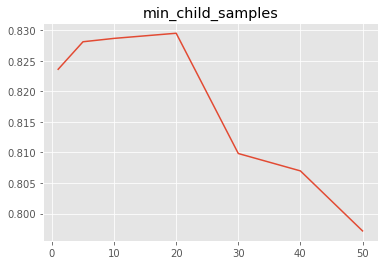

Computing test scores for reg_alpha = 0...Done!
Computing test scores for reg_alpha = 0.1...Done!
Computing test scores for reg_alpha = 0.2...Done!
Computing test scores for reg_alpha = 0.3...Done!
Computing test scores for reg_alpha = 0.4...Done!
Computing test scores for reg_alpha = 0.5...Done!
Computing test scores for reg_alpha = 0.6...Done!
Computing test scores for reg_alpha = 0.7...Done!
Computing test scores for reg_alpha = 0.8...Done!
Computing test scores for reg_alpha = 0.9...Done!


[ RESULTS ]
   Best Score: 0.8314712278032627
Optimal Value: 0.2


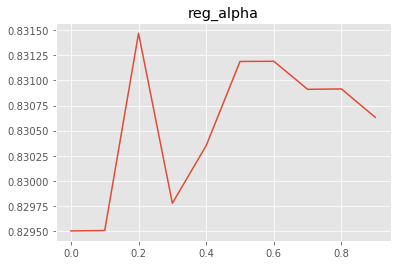

Computing test scores for reg_lambda = 0...Done!
Computing test scores for reg_lambda = 0.1...Done!
Computing test scores for reg_lambda = 0.2...Done!
Computing test scores for reg_lambda = 0.3...Done!
Computing test scores for reg_lambda = 0.4...Done!
Computing test scores for reg_lambda = 0.5...Done!
Computing test scores for reg_lambda = 0.6...Done!
Computing test scores for reg_lambda = 0.7...Done!
Computing test scores for reg_lambda = 0.8...Done!
Computing test scores for reg_lambda = 0.9...Done!


[ RESULTS ]
   Best Score: 0.8323222916330498
Optimal Value: 0.5


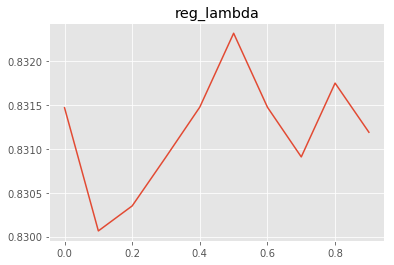

* ------------------------------------------- *
|              FOLD 01 COMPLETE!              |
* ------------------------------------------- *
Score: 0.7653631284916201


* ------------------------------------------- *
| FULL MODEL VALIDATION - NESTED CV - FOLD 02 |
* ------------------------------------------- *


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:  1.6min finished


   Best Score: 0.7915588936086388
Optimal Value: 47


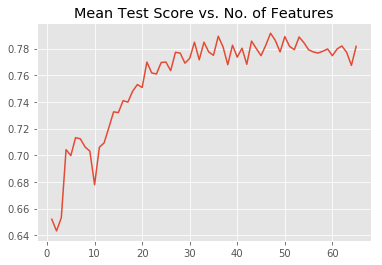

['pclass_OC', 'sex_BN', 'sibsp_NM', 'sibsp_OC', 'parch_NM', 'parch_OC', 'fare_NM', 'fare_OC', 'age_OC', 'age_NM', 'pclass_ME', 'title_ME', 'age_ME', 'sibsp_ME', 'ticlen_ME', 'fare_ME', 'cabletter_ME', 'cabno_ME', 'embarked_ME', 'pclass_OH_CLASS1', 'pclass_OH_CLASS2', 'pclass_OH_CLASS3', 'title_OH_Master.', 'title_OH_Miss.', 'title_OH_Mr.', 'title_OH_Other', 'sex_OH_female', 'sex_OH_male', 'sibsp_OH_None', 'parch_OH_None', 'ticlen_OH_L4', 'ticlen_OH_L5', 'ticlen_OH_L6', 'ticlen_OH_LO', 'fare_OH_G3', 'fare_OH_G4', 'fare_OH_G5', 'cabletter_OH_B/D/E', 'cabletter_OH_NIL', 'cabletter_OH_Others', 'cabno_OH_C1', 'cabno_OH_NIL', 'embarked_OH_C', 'embarked_OH_Q', 'embarked_OH_S', 'age_OH_A0', 'age_OH_A6']
Computing test scores for n_estimators = 10...Done!
Computing test scores for n_estimators = 25...Done!
Computing test scores for n_estimators = 50...Done!
Computing test scores for n_estimators = 75...Done!
Computing test scores for n_estimators = 100...Done!
Computing test scores for n_estima

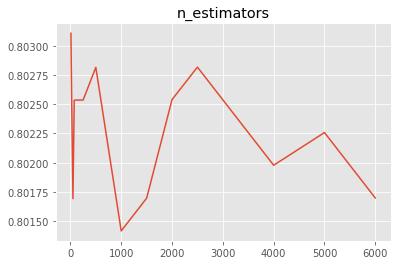

Computing test scores for colsample_bytree = 0.0425531914893617...Done!
Computing test scores for colsample_bytree = 0.06382978723404255...Done!
Computing test scores for colsample_bytree = 0.08510638297872339...Done!
Computing test scores for colsample_bytree = 0.10638297872340424...Done!
Computing test scores for colsample_bytree = 0.1276595744680851...Done!
Computing test scores for colsample_bytree = 0.14893617021276595...Done!
Computing test scores for colsample_bytree = 0.17021276595744678...Done!
Computing test scores for colsample_bytree = 0.19148936170212763...Done!
Computing test scores for colsample_bytree = 0.21276595744680848...Done!
Computing test scores for colsample_bytree = 0.23404255319148934...Done!
Computing test scores for colsample_bytree = 0.2553191489361702...Done!
Computing test scores for colsample_bytree = 0.276595744680851...Done!
Computing test scores for colsample_bytree = 0.29787234042553185...Done!
Computing test scores for colsample_bytree = 0.319148936

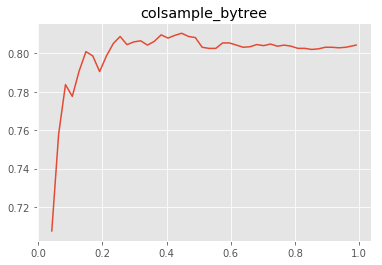

Computing test scores for subsample = 0.3...Done!
Computing test scores for subsample = 0.4...Done!
Computing test scores for subsample = 0.5...Done!
Computing test scores for subsample = 0.6...Done!
Computing test scores for subsample = 0.7...Done!
Computing test scores for subsample = 0.8...Done!
Computing test scores for subsample = 0.9...Done!
Computing test scores for subsample = 0.99...Done!


[ RESULTS ]
   Best Score: 0.8098515548980039
Optimal Value: 0.7


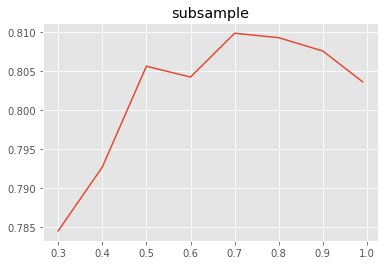

Computing test scores for min_child_samples = 1...Done!
Computing test scores for min_child_samples = 5...Done!
Computing test scores for min_child_samples = 10...Done!
Computing test scores for min_child_samples = 20...Done!
Computing test scores for min_child_samples = 30...Done!
Computing test scores for min_child_samples = 40...Done!
Computing test scores for min_child_samples = 50...Done!


[ RESULTS ]
   Best Score: 0.812083267845929
Optimal Value: 10


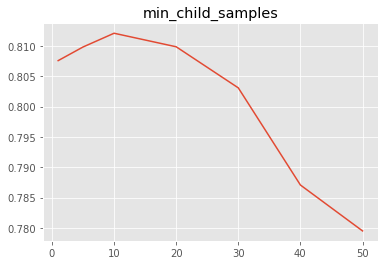

Computing test scores for reg_alpha = 0...Done!
Computing test scores for reg_alpha = 0.1...Done!
Computing test scores for reg_alpha = 0.2...Done!
Computing test scores for reg_alpha = 0.3...Done!
Computing test scores for reg_alpha = 0.4...Done!
Computing test scores for reg_alpha = 0.5...Done!
Computing test scores for reg_alpha = 0.6...Done!
Computing test scores for reg_alpha = 0.7...Done!
Computing test scores for reg_alpha = 0.8...Done!
Computing test scores for reg_alpha = 0.9...Done!


[ RESULTS ]
   Best Score: 0.8182588942373179
Optimal Value: 0.8


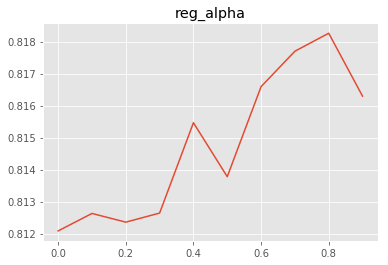

Computing test scores for reg_lambda = 0...Done!
Computing test scores for reg_lambda = 0.1...Done!
Computing test scores for reg_lambda = 0.2...Done!
Computing test scores for reg_lambda = 0.3...Done!
Computing test scores for reg_lambda = 0.4...Done!
Computing test scores for reg_lambda = 0.5...Done!
Computing test scores for reg_lambda = 0.6...Done!
Computing test scores for reg_lambda = 0.7...Done!
Computing test scores for reg_lambda = 0.8...Done!
Computing test scores for reg_lambda = 0.9...Done!


[ RESULTS ]
   Best Score: 0.8191099301258126
Optimal Value: 0.3


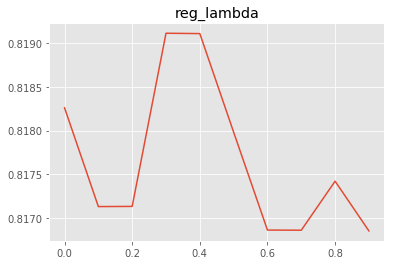

* ------------------------------------------- *
|              FOLD 02 COMPLETE!              |
* ------------------------------------------- *
Score: 0.8268156424581006


* ------------------------------------------- *
| FULL MODEL VALIDATION - NESTED CV - FOLD 03 |
* ------------------------------------------- *


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:  1.6min finished


   Best Score: 0.7876526310568862
Optimal Value: 47


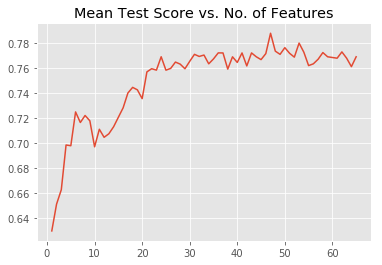

['pclass_OC', 'sex_BN', 'sibsp_NM', 'sibsp_OC', 'parch_NM', 'parch_OC', 'fare_NM', 'fare_OC', 'age_OC', 'age_NM', 'pclass_ME', 'title_ME', 'age_ME', 'sibsp_ME', 'ticlen_ME', 'fare_ME', 'cabletter_ME', 'cabno_ME', 'embarked_ME', 'pclass_OH_CLASS1', 'pclass_OH_CLASS2', 'pclass_OH_CLASS3', 'title_OH_Master.', 'title_OH_Miss.', 'title_OH_Mr.', 'title_OH_Other', 'sex_OH_female', 'sex_OH_male', 'sibsp_OH_None', 'parch_OH_None', 'ticlen_OH_L4', 'ticlen_OH_L5', 'ticlen_OH_L6', 'ticlen_OH_LO', 'fare_OH_G3', 'fare_OH_G4', 'fare_OH_G5', 'cabletter_OH_B/D/E', 'cabletter_OH_NIL', 'cabletter_OH_Others', 'cabno_OH_C1', 'cabno_OH_NIL', 'embarked_OH_C', 'embarked_OH_Q', 'embarked_OH_S', 'age_OH_A0', 'age_OH_A6']
Computing test scores for n_estimators = 10...Done!
Computing test scores for n_estimators = 25...Done!
Computing test scores for n_estimators = 50...Done!
Computing test scores for n_estimators = 75...Done!
Computing test scores for n_estimators = 100...Done!
Computing test scores for n_estima

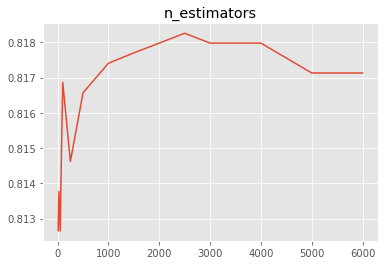

Computing test scores for colsample_bytree = 0.0425531914893617...Done!
Computing test scores for colsample_bytree = 0.06382978723404255...Done!
Computing test scores for colsample_bytree = 0.08510638297872339...Done!
Computing test scores for colsample_bytree = 0.10638297872340424...Done!
Computing test scores for colsample_bytree = 0.1276595744680851...Done!
Computing test scores for colsample_bytree = 0.14893617021276595...Done!
Computing test scores for colsample_bytree = 0.17021276595744678...Done!
Computing test scores for colsample_bytree = 0.19148936170212763...Done!
Computing test scores for colsample_bytree = 0.21276595744680848...Done!
Computing test scores for colsample_bytree = 0.23404255319148934...Done!
Computing test scores for colsample_bytree = 0.2553191489361702...Done!
Computing test scores for colsample_bytree = 0.276595744680851...Done!
Computing test scores for colsample_bytree = 0.29787234042553185...Done!
Computing test scores for colsample_bytree = 0.319148936

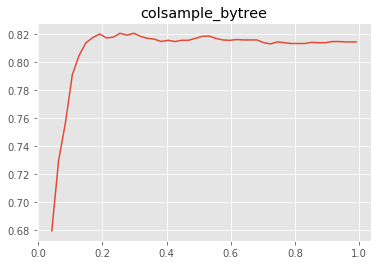

Computing test scores for subsample = 0.3...Done!
Computing test scores for subsample = 0.4...Done!
Computing test scores for subsample = 0.5...Done!
Computing test scores for subsample = 0.6...Done!
Computing test scores for subsample = 0.7...Done!
Computing test scores for subsample = 0.8...Done!
Computing test scores for subsample = 0.9...Done!
Computing test scores for subsample = 0.99...Done!


[ RESULTS ]
   Best Score: 0.8297574765659871
Optimal Value: 0.99


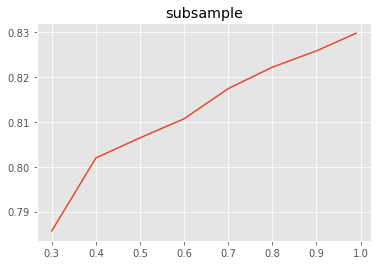

Computing test scores for min_child_samples = 1...Done!
Computing test scores for min_child_samples = 5...Done!
Computing test scores for min_child_samples = 10...Done!
Computing test scores for min_child_samples = 20...Done!
Computing test scores for min_child_samples = 30...Done!
Computing test scores for min_child_samples = 40...Done!
Computing test scores for min_child_samples = 50...Done!


[ RESULTS ]
   Best Score: 0.833673560482071
Optimal Value: 5


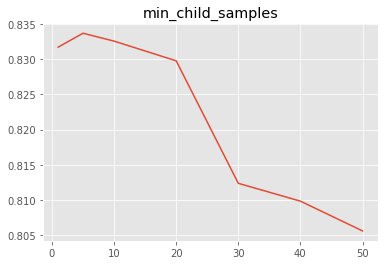

Computing test scores for reg_alpha = 0...Done!
Computing test scores for reg_alpha = 0.1...Done!
Computing test scores for reg_alpha = 0.2...Done!
Computing test scores for reg_alpha = 0.3...Done!
Computing test scores for reg_alpha = 0.4...Done!
Computing test scores for reg_alpha = 0.5...Done!
Computing test scores for reg_alpha = 0.6...Done!
Computing test scores for reg_alpha = 0.7...Done!
Computing test scores for reg_alpha = 0.8...Done!
Computing test scores for reg_alpha = 0.9...Done!


[ RESULTS ]
   Best Score: 0.834792441600952
Optimal Value: 0.3


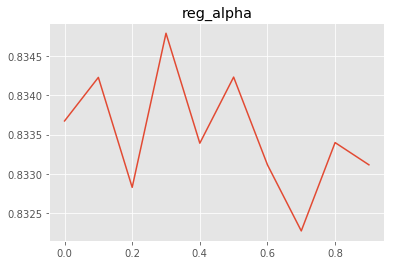

Computing test scores for reg_lambda = 0...Done!
Computing test scores for reg_lambda = 0.1...Done!
Computing test scores for reg_lambda = 0.2...Done!
Computing test scores for reg_lambda = 0.3...Done!
Computing test scores for reg_lambda = 0.4...Done!
Computing test scores for reg_lambda = 0.5...Done!
Computing test scores for reg_lambda = 0.6...Done!
Computing test scores for reg_lambda = 0.7...Done!
Computing test scores for reg_lambda = 0.8...Done!
Computing test scores for reg_lambda = 0.9...Done!


[ RESULTS ]
   Best Score: 0.8348003769280364
Optimal Value: 0.5


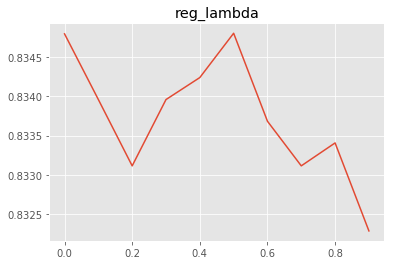

* ------------------------------------------- *
|              FOLD 03 COMPLETE!              |
* ------------------------------------------- *
Score: 0.7921348314606742


* ------------------------------------------- *
| FULL MODEL VALIDATION - NESTED CV - FOLD 04 |
* ------------------------------------------- *


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:  1.5min finished


   Best Score: 0.802293309527352
Optimal Value: 47


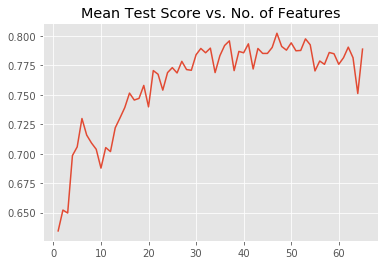

['pclass_OC', 'sex_BN', 'sibsp_NM', 'sibsp_OC', 'parch_NM', 'parch_OC', 'fare_NM', 'fare_OC', 'age_OC', 'age_NM', 'pclass_ME', 'title_ME', 'age_ME', 'sibsp_ME', 'ticlen_ME', 'fare_ME', 'cabletter_ME', 'cabno_ME', 'embarked_ME', 'pclass_OH_CLASS1', 'pclass_OH_CLASS2', 'pclass_OH_CLASS3', 'title_OH_Master.', 'title_OH_Miss.', 'title_OH_Mr.', 'title_OH_Other', 'sex_OH_female', 'sex_OH_male', 'sibsp_OH_None', 'parch_OH_None', 'ticlen_OH_L4', 'ticlen_OH_L5', 'ticlen_OH_L6', 'ticlen_OH_LO', 'fare_OH_G3', 'fare_OH_G4', 'fare_OH_G5', 'cabletter_OH_B/D/E', 'cabletter_OH_NIL', 'cabletter_OH_Others', 'cabno_OH_C1', 'cabno_OH_NIL', 'embarked_OH_C', 'embarked_OH_Q', 'embarked_OH_S', 'age_OH_A0', 'age_OH_A6']
Computing test scores for n_estimators = 10...Done!
Computing test scores for n_estimators = 25...Done!
Computing test scores for n_estimators = 50...Done!
Computing test scores for n_estimators = 75...Done!
Computing test scores for n_estimators = 100...Done!
Computing test scores for n_estima

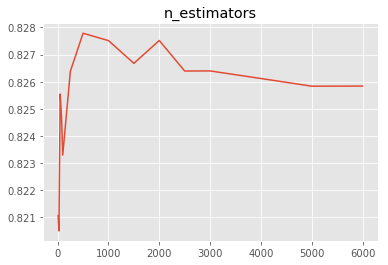

Computing test scores for colsample_bytree = 0.0425531914893617...Done!
Computing test scores for colsample_bytree = 0.06382978723404255...Done!
Computing test scores for colsample_bytree = 0.08510638297872339...Done!
Computing test scores for colsample_bytree = 0.10638297872340424...Done!
Computing test scores for colsample_bytree = 0.1276595744680851...Done!
Computing test scores for colsample_bytree = 0.14893617021276595...Done!
Computing test scores for colsample_bytree = 0.17021276595744678...Done!
Computing test scores for colsample_bytree = 0.19148936170212763...Done!
Computing test scores for colsample_bytree = 0.21276595744680848...Done!
Computing test scores for colsample_bytree = 0.23404255319148934...Done!
Computing test scores for colsample_bytree = 0.2553191489361702...Done!
Computing test scores for colsample_bytree = 0.276595744680851...Done!
Computing test scores for colsample_bytree = 0.29787234042553185...Done!
Computing test scores for colsample_bytree = 0.319148936

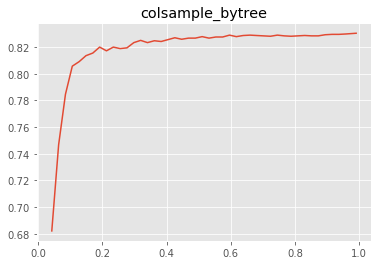

Computing test scores for subsample = 0.3...Done!
Computing test scores for subsample = 0.4...Done!
Computing test scores for subsample = 0.5...Done!
Computing test scores for subsample = 0.6...Done!
Computing test scores for subsample = 0.7...Done!
Computing test scores for subsample = 0.8...Done!
Computing test scores for subsample = 0.9...Done!
Computing test scores for subsample = 0.99...Done!


[ RESULTS ]
   Best Score: 0.8334017755294351
Optimal Value: 0.8


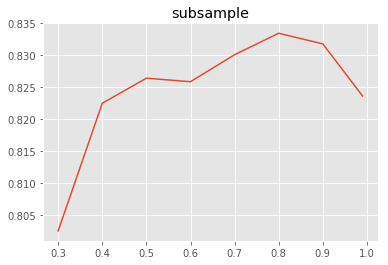

Computing test scores for min_child_samples = 1...Done!
Computing test scores for min_child_samples = 5...Done!
Computing test scores for min_child_samples = 10...Done!
Computing test scores for min_child_samples = 20...Done!
Computing test scores for min_child_samples = 30...Done!
Computing test scores for min_child_samples = 40...Done!
Computing test scores for min_child_samples = 50...Done!


[ RESULTS ]
   Best Score: 0.8404265238307791
Optimal Value: 10


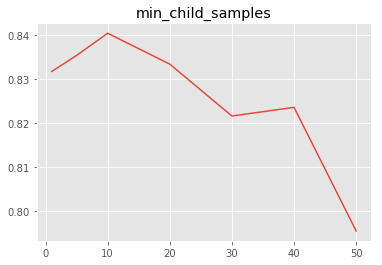

Computing test scores for reg_alpha = 0...Done!
Computing test scores for reg_alpha = 0.1...Done!
Computing test scores for reg_alpha = 0.2...Done!
Computing test scores for reg_alpha = 0.3...Done!
Computing test scores for reg_alpha = 0.4...Done!
Computing test scores for reg_alpha = 0.5...Done!
Computing test scores for reg_alpha = 0.6...Done!
Computing test scores for reg_alpha = 0.7...Done!
Computing test scores for reg_alpha = 0.8...Done!
Computing test scores for reg_alpha = 0.9...Done!


[ RESULTS ]
   Best Score: 0.8418171899022963
Optimal Value: 0.8


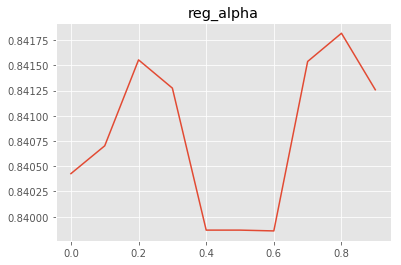

Computing test scores for reg_lambda = 0...Done!
Computing test scores for reg_lambda = 0.1...Done!
Computing test scores for reg_lambda = 0.2...Done!
Computing test scores for reg_lambda = 0.3...Done!
Computing test scores for reg_lambda = 0.4...Done!
Computing test scores for reg_lambda = 0.5...Done!
Computing test scores for reg_lambda = 0.6...Done!
Computing test scores for reg_lambda = 0.7...Done!
Computing test scores for reg_lambda = 0.8...Done!
Computing test scores for reg_lambda = 0.9...Done!


[ RESULTS ]
   Best Score: 0.8418171899022963
Optimal Value: 0


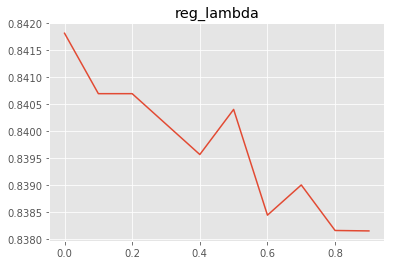

* ------------------------------------------- *
|              FOLD 04 COMPLETE!              |
* ------------------------------------------- *
Score: 0.6123595505617978


* ------------------------------------------- *
| FULL MODEL VALIDATION - NESTED CV - FOLD 05 |
* ------------------------------------------- *


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:  1.6min finished


   Best Score: 0.7998149151318166
Optimal Value: 47


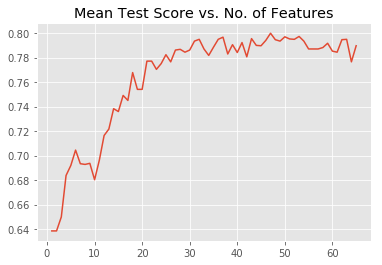

['pclass_OC', 'sex_BN', 'sibsp_NM', 'sibsp_OC', 'parch_NM', 'parch_OC', 'fare_NM', 'fare_OC', 'age_OC', 'age_NM', 'pclass_ME', 'title_ME', 'age_ME', 'sibsp_ME', 'ticlen_ME', 'fare_ME', 'cabletter_ME', 'cabno_ME', 'embarked_ME', 'pclass_OH_CLASS1', 'pclass_OH_CLASS2', 'pclass_OH_CLASS3', 'title_OH_Master.', 'title_OH_Miss.', 'title_OH_Mr.', 'title_OH_Other', 'sex_OH_female', 'sex_OH_male', 'sibsp_OH_None', 'parch_OH_None', 'ticlen_OH_L4', 'ticlen_OH_L5', 'ticlen_OH_L6', 'ticlen_OH_LO', 'fare_OH_G3', 'fare_OH_G4', 'fare_OH_G5', 'cabletter_OH_B/D/E', 'cabletter_OH_NIL', 'cabletter_OH_Others', 'cabno_OH_C1', 'cabno_OH_NIL', 'embarked_OH_C', 'embarked_OH_Q', 'embarked_OH_S', 'age_OH_A0', 'age_OH_A6']
Computing test scores for n_estimators = 10...Done!
Computing test scores for n_estimators = 25...Done!
Computing test scores for n_estimators = 50...Done!
Computing test scores for n_estimators = 75...Done!
Computing test scores for n_estimators = 100...Done!
Computing test scores for n_estima

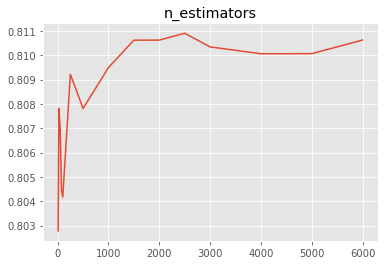

Computing test scores for colsample_bytree = 0.043478260869565216...Done!
Computing test scores for colsample_bytree = 0.06521739130434782...Done!
Computing test scores for colsample_bytree = 0.08695652173913043...Done!
Computing test scores for colsample_bytree = 0.10869565217391304...Done!
Computing test scores for colsample_bytree = 0.13043478260869565...Done!
Computing test scores for colsample_bytree = 0.15217391304347827...Done!
Computing test scores for colsample_bytree = 0.17391304347826086...Done!
Computing test scores for colsample_bytree = 0.1956521739130435...Done!
Computing test scores for colsample_bytree = 0.21739130434782608...Done!
Computing test scores for colsample_bytree = 0.23913043478260868...Done!
Computing test scores for colsample_bytree = 0.2608695652173913...Done!
Computing test scores for colsample_bytree = 0.28260869565217395...Done!
Computing test scores for colsample_bytree = 0.30434782608695654...Done!
Computing test scores for colsample_bytree = 0.32608

In [ ]:
# Loop through all meta folds
for mf in range(len(meta_folds)):
    
    print('* ------------------------------------------- *')
    print('| FULL MODEL VALIDATION - NESTED CV - FOLD ' + '{:02}'.format(mf+1) + ' |')
    print('* ------------------------------------------- *')
    
    # Get train and test indices
    tr_idx = meta_folds['set' + str(mf+1)]['train']
    te_idx = meta_folds['set' + str(mf+1)]['test']
    
    # Configure meta sets
    temp_tr_df = df.iloc[tr_idx, :].copy()
    temp_te_df = df.iloc[te_idx, :].copy()
    temp_tr_df_enc, temp_map = kt.encode_train(temp_tr_df)
    temp_te_df_enc = kt.map_test(temp_te_df, temp_map)

    # Obtain splits
    temp_X_train = pd.get_dummies(temp_tr_df_enc.drop('Survived', axis = 1))
    temp_y_train = temp_tr_df_enc['Survived']
    temp_X_test = pd.get_dummies(temp_te_df_enc.drop('Survived', axis = 1))
    temp_y_test = temp_te_df_enc['Survived']
    
    # Get sets
    temp_folds = kt.get_folds(df=temp_tr_df, random_state = 123)
    temp_sets = kt.prep_sets(df=temp_tr_df, folds=temp_folds)
    
    # ---- FEATURE SELECTION ---- #
    # Run RFECV
    cv_res, best_n_features, opt_feats = kt.custom_rfecv(
        estimator = LGBMClassifier(
            boosting_type = 'rf',
            objective = 'binary',
            subsample_freq = 1,
            subsample = 0.75,
            max_depth = 5,
            colsample_bytree = 0.5,
            random_state = 123,
            n_jobs = 3
        ),
        sub_sets = temp_sets,
        df = df_encoded,
        step = 1,
        n_jobs = 3,
        verbose = True
    )
    
    # Separate features
    final_feats = list(opt_feats)
    print(final_feats)

    # Re-generate sets
    temp_fs_sets = kt.prep_sets(df = temp_tr_df, folds = temp_folds, feats = final_feats)
    
    
    # ---- NO. OF TREES ---- #
    # Grid Search with CV
    cv_res, best_n_estimators = kt.score_grid(
        estimator = LGBMClassifier(
            boosting_type = 'rf',
            objective = 'binary',
            subsample_freq = 1,
            max_depth = 5,
            # n_estimators = best_n_estimators,
            colsample_bytree = 0.5,
            subsample = 0.75,
            # min_child_samples = ,
            # reg_alpha = ,
            # reg_lambda = ,
            random_state = 123,
            n_jobs = 3
        ),
        params = param_estimators,
        all_sets = temp_fs_sets,
        n_jobs = 3,
        verbose = True
    )
    
    
    # ---- MAX FEATURES ---- #
    # Get max features
    n_feat = np.min([temp_fs_sets[i][0].shape[1] for i in range(len(temp_fs_sets))])
    
    # Generate hyperparameter values to tune
    colsample_probs = np.arange(2/n_feat, 1, 1/n_feat)
    
    # Replace last value with 1.0 to ensure that the proportion is within allowable limits
    colsample_probs[len(colsample_probs)-1] = 0.99
    
    # Define parameters
    param_colsample = {
        'colsample_bytree': colsample_probs
    }

    # Grid Search with CV
    cv_res, best_colsample_bytree = kt.score_grid(
        estimator = LGBMClassifier(
            boosting_type = 'rf',
            objective = 'binary',
            subsample_freq = 1,
            max_depth = 5,
            n_estimators = best_n_estimators,
            colsample_bytree = 0.5,
            subsample = 0.75,
            # min_child_samples = ,
            # reg_alpha = ,
            # reg_lambda = ,
            random_state = 123,
            n_jobs = 3
        ),
        params = param_colsample,
        all_sets = temp_fs_sets,
        n_jobs = 3,
        verbose = True
    )
    
    
    # ---- SUBSAMPLING PROPORTION ---- #
    # Grid Search with CV
    cv_res, best_subsample = kt.score_grid(
        estimator = LGBMClassifier(
            boosting_type = 'rf',
            objective = 'binary',
            subsample_freq = 1,
            max_depth = 5,
            n_estimators = best_n_estimators,
            colsample_bytree = best_colsample_bytree,
            # subsample = 0.75,
            # min_child_samples = ,
            # reg_alpha = ,
            # reg_lambda = ,
            random_state = 123,
            n_jobs = 3
        ),
        params = param_subsample,
        all_sets = temp_fs_sets,
        n_jobs = 3,
        verbose = True
    )
    
    
    # ---- MIN. SAMPLES IN LEAF ---- #
    # Grid Search with CV
    cv_res, best_min_leaf = kt.score_grid(
        estimator = LGBMClassifier(
            boosting_type = 'rf',
            objective = 'binary',
            subsample_freq = 1,
            max_depth = 5,
            n_estimators = best_n_estimators,
            colsample_bytree = best_colsample_bytree,
            subsample = best_subsample,
            # min_child_samples = ,
            # reg_alpha = ,
            # reg_lambda = ,
            random_state = 123,
            n_jobs = 3
        ),
        params = param_min_child_samples,
        all_sets = temp_fs_sets,
        n_jobs = 3,
        verbose = True
    )
    
    
    # ---- L1 REGULARISATION ---- #
    # Grid Search with CV
    cv_res, best_alpha = kt.score_grid(
        estimator = LGBMClassifier(
            boosting_type = 'rf',
            objective = 'binary',
            subsample_freq = 1,
            max_depth = 5,
            n_estimators = best_n_estimators,
            colsample_bytree = best_colsample_bytree,
            subsample = best_subsample,
            min_child_samples = best_min_leaf,
            # reg_alpha = ,
            # reg_lambda = ,
            random_state = 123,
            n_jobs = 3
        ),
        params = param_alpha,
        all_sets = temp_fs_sets,
        n_jobs = 3,
        verbose = True
    )
    
    
    # ---- L2 REGULARISATION ---- #
    # Grid Search with CV
    cv_res, best_lambda = kt.score_grid(
        estimator = LGBMClassifier(
            boosting_type = 'rf',
            objective = 'binary',
            subsample_freq = 1,
            max_depth = 5,
            n_estimators = best_n_estimators,
            colsample_bytree = best_colsample_bytree,
            subsample = best_subsample,
            min_child_samples = best_min_leaf,
            reg_alpha = best_alpha,
            # reg_lambda = ,
            random_state = 123,
            n_jobs = 3
        ),
        params = param_lambda,
        all_sets = temp_fs_sets,
        n_jobs = 3,
        verbose = True
    )
    
    # ---- FINAL MODEL ---- #
    temp_model = LGBMClassifier(
        boosting_type = 'rf',
        objective = 'binary',
        subsample_freq = 1,
        max_depth = 5,
        n_estimators = best_n_estimators,
        colsample_bytree = best_colsample_bytree,
        subsample = best_subsample,
        min_child_samples = best_min_leaf,
        reg_alpha = best_alpha,
        reg_lambda = best_lambda,
        random_state = 123,
        n_jobs = 3
    )
    
    # Fit model
    temp_model.fit(temp_X_train, temp_y_train)
    
    # Score model
    temp_score = temp_model.score(temp_X_test, temp_y_test)
    
    # Score model
    all_results.append(temp_score)
    
    print('* ------------------------------------------- *')
    print('|              FOLD ' + '{:02}'.format(mf+1) + ' COMPLETE!              |')
    print('* ------------------------------------------- *')
    # Update
    print('Score: ' + str(temp_score))
    print()
    print()
    

# Troubleshooting

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:  1.1min finished


   Best Score: 0.8007571624592901
Optimal Value: 28


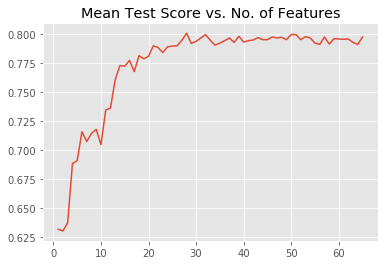

['pclass_OC', 'sex_BN', 'sibsp_NM', 'sibsp_OC', 'parch_NM', 'fare_NM', 'fare_OC', 'age_OC', 'age_NM', 'pclass_ME', 'title_ME', 'age_ME', 'sibsp_ME', 'ticlen_ME', 'fare_ME', 'cabletter_ME', 'cabno_ME', 'embarked_ME', 'pclass_OH_CLASS3', 'title_OH_Mr.', 'sex_OH_female', 'ticlen_OH_L4', 'ticlen_OH_L5', 'ticlen_OH_L6', 'ticlen_OH_LO', 'cabletter_OH_B/D/E', 'cabno_OH_C1', 'embarked_OH_S']
Computing test scores for n_estimators = 10...Done!
Computing test scores for n_estimators = 25...Done!
Computing test scores for n_estimators = 50...Done!
Computing test scores for n_estimators = 75...Done!
Computing test scores for n_estimators = 100...Done!
Computing test scores for n_estimators = 250...Done!
Computing test scores for n_estimators = 500...Done!
Computing test scores for n_estimators = 1000...Done!
Computing test scores for n_estimators = 1500...Done!
Computing test scores for n_estimators = 2000...Done!
Computing test scores for n_estimators = 2500...Done!
Computing test scores for n_es

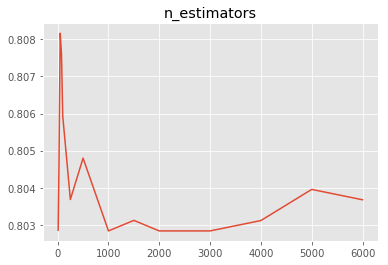

Computing test scores for colsample_bytree = 0.07142857142857142...Done!
Computing test scores for colsample_bytree = 0.10714285714285714...Done!
Computing test scores for colsample_bytree = 0.14285714285714285...Done!
Computing test scores for colsample_bytree = 0.17857142857142855...Done!
Computing test scores for colsample_bytree = 0.21428571428571427...Done!
Computing test scores for colsample_bytree = 0.24999999999999997...Done!
Computing test scores for colsample_bytree = 0.2857142857142857...Done!
Computing test scores for colsample_bytree = 0.3214285714285714...Done!
Computing test scores for colsample_bytree = 0.3571428571428571...Done!
Computing test scores for colsample_bytree = 0.3928571428571428...Done!
Computing test scores for colsample_bytree = 0.4285714285714285...Done!
Computing test scores for colsample_bytree = 0.4642857142857143...Done!
Computing test scores for colsample_bytree = 0.5...Done!
Computing test scores for colsample_bytree = 0.5357142857142857...Done!
C

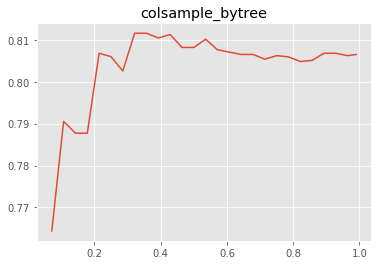

Computing test scores for subsample = 0.3...Done!
Computing test scores for subsample = 0.4...Done!
Computing test scores for subsample = 0.5...Done!
Computing test scores for subsample = 0.6...Done!
Computing test scores for subsample = 0.7...Done!
Computing test scores for subsample = 0.8...Done!
Computing test scores for subsample = 0.9...Done!
Computing test scores for subsample = 0.99...Done!


[ RESULTS ]
   Best Score: 0.8152001190299062
Optimal Value: 0.9


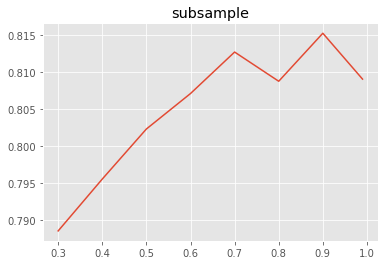

Computing test scores for min_child_samples = 1...Done!
Computing test scores for min_child_samples = 5...Done!
Computing test scores for min_child_samples = 10...Done!
Computing test scores for min_child_samples = 20...Done!
Computing test scores for min_child_samples = 30...Done!
Computing test scores for min_child_samples = 40...Done!
Computing test scores for min_child_samples = 50...Done!


[ RESULTS ]
   Best Score: 0.820258890046124
Optimal Value: 10


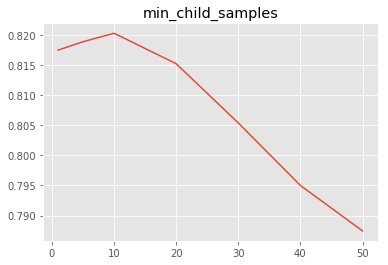

Computing test scores for reg_alpha = 0...Done!
Computing test scores for reg_alpha = 0.1...Done!
Computing test scores for reg_alpha = 0.2...Done!
Computing test scores for reg_alpha = 0.3...Done!
Computing test scores for reg_alpha = 0.4...Done!
Computing test scores for reg_alpha = 0.5...Done!
Computing test scores for reg_alpha = 0.6...Done!
Computing test scores for reg_alpha = 0.7...Done!
Computing test scores for reg_alpha = 0.8...Done!
Computing test scores for reg_alpha = 0.9...Done!


[ RESULTS ]
   Best Score: 0.820258890046124
Optimal Value: 0


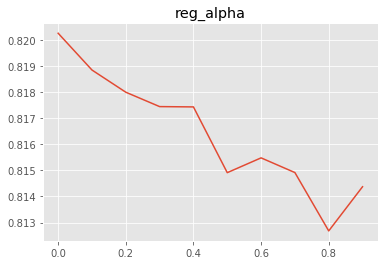

Computing test scores for reg_lambda = 0...Done!
Computing test scores for reg_lambda = 0.1...Done!
Computing test scores for reg_lambda = 0.2...Done!
Computing test scores for reg_lambda = 0.3...Done!
Computing test scores for reg_lambda = 0.4...Done!
Computing test scores for reg_lambda = 0.5...Done!
Computing test scores for reg_lambda = 0.6...Done!
Computing test scores for reg_lambda = 0.7...Done!
Computing test scores for reg_lambda = 0.8...Done!
Computing test scores for reg_lambda = 0.9...Done!


[ RESULTS ]
   Best Score: 0.820258890046124
Optimal Value: 0


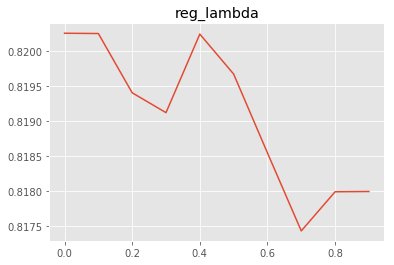

In [30]:
mf = 22

# Get train and test indices
tr_idx = meta_folds['set' + str(mf+1)]['train']
te_idx = meta_folds['set' + str(mf+1)]['test']

# Configure meta sets
temp_tr_df = df.iloc[tr_idx, :].copy()
temp_te_df = df.iloc[te_idx, :].copy()
temp_tr_df_enc, temp_map = kt.encode_train(temp_tr_df)
temp_te_df_enc = kt.map_test(temp_te_df, temp_map)

# Obtain splits
temp_X_train = pd.get_dummies(temp_tr_df_enc.drop('Survived', axis = 1))
temp_y_train = temp_tr_df_enc['Survived']
temp_X_test = pd.get_dummies(temp_te_df_enc.drop('Survived', axis = 1))
temp_y_test = temp_te_df_enc['Survived']

# Get sets
temp_folds = kt.get_folds(df=temp_tr_df, random_state = 123)
temp_sets = kt.prep_sets(df=temp_tr_df, folds=temp_folds)

# ---- FEATURE SELECTION ---- #
# Run RFECV
cv_res, best_n_features, opt_feats = kt.custom_rfecv(
    estimator = LGBMClassifier(
        boosting_type = 'rf',
        objective = 'binary',
        subsample_freq = 1,
        subsample = 0.75,
        max_depth = 5,
        colsample_bytree = 0.5,
        random_state = 123,
        n_jobs = 3
    ),
    sub_sets = temp_sets,
    df = df_encoded,
    step = 1,
    n_jobs = 3,
    verbose = True
)

# Separate features
final_feats = list(opt_feats)
print(final_feats)

# Re-generate sets
temp_fs_sets = kt.prep_sets(df = temp_tr_df, folds = temp_folds, feats = final_feats)


# ---- NO. OF TREES ---- #
# Grid Search with CV
cv_res, best_n_estimators = kt.score_grid(
    estimator = LGBMClassifier(
        boosting_type = 'rf',
        objective = 'binary',
        subsample_freq = 1,
        max_depth = 5,
        # n_estimators = best_n_estimators,
        colsample_bytree = 0.5,
        subsample = 0.75,
        # min_child_samples = ,
        # reg_alpha = ,
        # reg_lambda = ,
        random_state = 123,
        n_jobs = 3
    ),
    params = param_estimators,
    all_sets = temp_fs_sets,
    n_jobs = 3,
    verbose = True
)



# ---- MAX FEATURES ---- #
# Get max features
n_feat = np.min([temp_fs_sets[i][0].shape[1] for i in range(len(temp_fs_sets))])
colsample_probs = np.arange(2/n_feat, 1, 1/n_feat)
colsample_probs[len(colsample_probs)-1] = 0.99



# Define parameters
param_colsample = {
    'colsample_bytree': colsample_probs
}

# Grid Search with CV
cv_res, best_colsample_bytree = kt.score_grid(
    estimator = LGBMClassifier(
        boosting_type = 'rf',
        objective = 'binary',
        subsample_freq = 1,
        max_depth = 5,
        n_estimators = best_n_estimators,
        colsample_bytree = 0.5,
        subsample = 0.75,
        # min_child_samples = ,
        # reg_alpha = ,
        # reg_lambda = ,
        random_state = 123,
        n_jobs = 3
    ),
    params = param_colsample,
    all_sets = temp_fs_sets,
    n_jobs = 3,
    verbose = True
)

# ---- SUBSAMPLING PROPORTION ---- #
# Grid Search with CV
cv_res, best_subsample = kt.score_grid(
    estimator = LGBMClassifier(
        boosting_type = 'rf',
        objective = 'binary',
        subsample_freq = 1,
        max_depth = 5,
        n_estimators = best_n_estimators,
        colsample_bytree = best_colsample_bytree,
        # subsample = 0.75,
        # min_child_samples = ,
        # reg_alpha = ,
        # reg_lambda = ,
        random_state = 123,
        n_jobs = 3
    ),
    params = param_subsample,
    all_sets = temp_fs_sets,
    n_jobs = 3,
    verbose = True
)


# ---- MIN. SAMPLES IN LEAF ---- #
# Grid Search with CV
cv_res, best_min_leaf = kt.score_grid(
    estimator = LGBMClassifier(
        boosting_type = 'rf',
        objective = 'binary',
        subsample_freq = 1,
        max_depth = 5,
        n_estimators = best_n_estimators,
        colsample_bytree = best_colsample_bytree,
        subsample = best_subsample,
        # min_child_samples = ,
        # reg_alpha = ,
        # reg_lambda = ,
        random_state = 123,
        n_jobs = 3
    ),
    params = param_min_child_samples,
    all_sets = temp_fs_sets,
    n_jobs = 3,
    verbose = True
)


# ---- L1 REGULARISATION ---- #
# Grid Search with CV
cv_res, best_alpha = kt.score_grid(
    estimator = LGBMClassifier(
        boosting_type = 'rf',
        objective = 'binary',
        subsample_freq = 1,
        max_depth = 5,
        n_estimators = best_n_estimators,
        colsample_bytree = best_colsample_bytree,
        subsample = best_subsample,
        min_child_samples = best_min_leaf,
        # reg_alpha = ,
        # reg_lambda = ,
        random_state = 123,
        n_jobs = 3
    ),
    params = param_alpha,
    all_sets = temp_fs_sets,
    n_jobs = 3,
    verbose = True
)


# ---- L2 REGULARISATION ---- #
# Grid Search with CV
cv_res, best_lambda = kt.score_grid(
    estimator = LGBMClassifier(
        boosting_type = 'rf',
        objective = 'binary',
        subsample_freq = 1,
        max_depth = 5,
        n_estimators = best_n_estimators,
        colsample_bytree = best_colsample_bytree,
        subsample = best_subsample,
        min_child_samples = best_min_leaf,
        reg_alpha = best_alpha,
        # reg_lambda = ,
        random_state = 123,
        n_jobs = 3
    ),
    params = param_lambda,
    all_sets = temp_fs_sets,
    n_jobs = 3,
    verbose = True
)

# ---- FINAL MODEL ---- #
temp_model = LGBMClassifier(
    boosting_type = 'rf',
    objective = 'binary',
    subsample_freq = 1,
    max_depth = 5,
    n_estimators = best_n_estimators,
    colsample_bytree = best_colsample_bytree,
    subsample = best_subsample,
    min_child_samples = best_min_leaf,
    reg_alpha = best_alpha,
    reg_lambda = best_lambda,
    random_state = 123,
    n_jobs = 3
)

# Fit model
temp_model.fit(temp_X_train, temp_y_train)

# Score model
temp_score = temp_model.score(temp_X_test, temp_y_test)

In [31]:
temp_score

0.8146067415730337

## Iteration 1: Optimise No. of Trees

Computing test scores for n_estimators = 100...Done!
Computing test scores for n_estimators = 250...Done!
Computing test scores for n_estimators = 500...Done!
Computing test scores for n_estimators = 1000...Done!
Computing test scores for n_estimators = 1500...Done!
Computing test scores for n_estimators = 2000...Done!
Computing test scores for n_estimators = 2500...Done!
Computing test scores for n_estimators = 3000...Done!
Computing test scores for n_estimators = 4000...Done!
Computing test scores for n_estimators = 5000...Done!
Computing test scores for n_estimators = 6000...Done!


[ RESULTS ]
   Best Score: 0.824904200210867
Optimal Value: 250


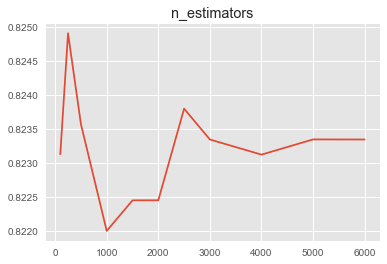

In [4]:
# Define parameters
param_n_estimators = [100, 250, 500, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 6000]
params = {
    'n_estimators': param_n_estimators
}

# Grid Search with CV
cv_res, best_n_estimators = kt.score_grid(
    estimator = LGBMClassifier(
        boosting_type = 'rf',
        objective = 'binary',
        subsample_freq = 1,
        max_depth = 5,
        # n_estimators = ,
        colsample_bytree = 0.5,
        subsample = 0.75,
        # min_child_samples = ,
        # reg_alpha = ,
        # reg_lambda = ,
        random_state = 123,
        n_jobs = 3
    ),
    params = params,
    all_sets = all_sets,
    n_jobs = 3,
    verbose = True
)

In [6]:
print(all_results)

[0.7653631284916201, 0.8268156424581006, 0.7921348314606742, 0.6123595505617978, 0.7570621468926554, 0.8324022346368715, 0.6033519553072626, 0.7808988764044944, 0.702247191011236, 0.7853107344632768, 0.8100558659217877, 0.8044692737430168, 0.7247191011235955, 0.7921348314606742, 0.7344632768361582, 0.8100558659217877, 0.7877094972067039, 0.8089887640449438, 0.7921348314606742, 0.7740112994350282, 0.8100558659217877, 0.8044692737430168]


## Iteration 2: RFECV for Feature Selection

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed: 33.0min finished


   Best Score: 0.8244610674494207
Optimal Value: 36


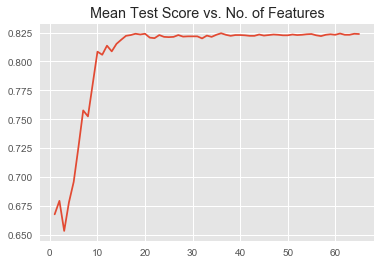

In [5]:
# Run RFECV
cv_res, best_n_features, opt_feats = kt.custom_rfecv(
    estimator = LGBMClassifier(
        boosting_type = 'rf',
        objective = 'binary',
        subsample_freq = 1,
        max_depth = 5,
        n_estimators = 2500,
        colsample_bytree = 0.5,
        subsample = 0.75,
        # min_child_samples = ,
        # reg_alpha = ,
        # reg_lambda = ,
        random_state = 123,
        n_jobs = 3
    ),
    sub_sets = all_sets,
    df = df_encoded,
    step = 1,
    n_jobs = 3,
    verbose = True
)

### Subset Features

In [4]:
# Set features
final_feats = [
    'pclass_OC', 'sex_BN', 'age_OC', 'age_NM', 'sibsp_NM', 'sibsp_OC', 'parch_NM', 'parch_OC',
    'fare_NM', 'fare_OC', 'pclass_ME', 'title_ME', 'age_ME', 'sibsp_ME', 'ticlen_ME', 'fare_ME', 'cabletter_ME',
    'cabno_ME', 'embarked_ME', 'pclass_OH_CLASS3', 'title_OH_Master.', 'title_OH_Miss.', 'title_OH_Mr.',
    'sex_OH_female', 'age_OH_A6', 'sibsp_OH_None', 'ticlen_OH_L4', 'ticlen_OH_L5', 'ticlen_OH_L6', 'ticlen_OH_LO',
    'fare_OH_G4', 'cabletter_OH_B/D/E', 'cabletter_OH_Others', 'cabno_OH_C1', 'cabno_OH_NIL', 'embarked_OH_S'
]

# Separate features
# final_feats = list(opt_feats)
print(final_feats)

['pclass_OC', 'sex_BN', 'age_OC', 'age_NM', 'sibsp_NM', 'sibsp_OC', 'parch_NM', 'parch_OC', 'fare_NM', 'fare_OC', 'pclass_ME', 'title_ME', 'age_ME', 'sibsp_ME', 'ticlen_ME', 'fare_ME', 'cabletter_ME', 'cabno_ME', 'embarked_ME', 'pclass_OH_CLASS3', 'title_OH_Master.', 'title_OH_Miss.', 'title_OH_Mr.', 'sex_OH_female', 'age_OH_A6', 'sibsp_OH_None', 'ticlen_OH_L4', 'ticlen_OH_L5', 'ticlen_OH_L6', 'ticlen_OH_LO', 'fare_OH_G4', 'cabletter_OH_B/D/E', 'cabletter_OH_Others', 'cabno_OH_C1', 'cabno_OH_NIL', 'embarked_OH_S']


In [5]:
# Re-generate sets
new_sets = kt.prep_sets(df = df, folds = folds, feats = final_feats)

## Iteration 3: Tune Maximum Features

In [8]:
# Get max features
n_feat = np.min([new_sets[i][0].shape[1] for i in range(len(new_sets))])

Computing test scores for colsample_bytree = 0.05555555555555555...Done!
Computing test scores for colsample_bytree = 0.08333333333333333...Done!
Computing test scores for colsample_bytree = 0.1111111111111111...Done!
Computing test scores for colsample_bytree = 0.1388888888888889...Done!
Computing test scores for colsample_bytree = 0.16666666666666666...Done!
Computing test scores for colsample_bytree = 0.19444444444444445...Done!
Computing test scores for colsample_bytree = 0.2222222222222222...Done!
Computing test scores for colsample_bytree = 0.24999999999999997...Done!
Computing test scores for colsample_bytree = 0.2777777777777778...Done!
Computing test scores for colsample_bytree = 0.3055555555555556...Done!
Computing test scores for colsample_bytree = 0.33333333333333337...Done!
Computing test scores for colsample_bytree = 0.36111111111111105...Done!
Computing test scores for colsample_bytree = 0.38888888888888884...Done!
Computing test scores for colsample_bytree = 0.416666666

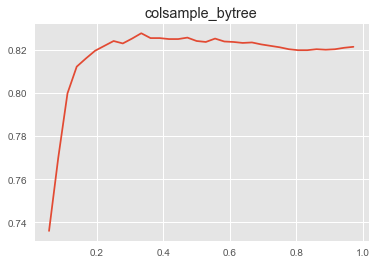

In [10]:
# Define parameters
param_max_feat = np.arange(2/n_feat, 1, 1/n_feat)
params = {
    'colsample_bytree': param_max_feat
}

# Grid Search with CV
cv_res, best_colsample_bytree = kt.score_grid(
    estimator = LGBMClassifier(
        boosting_type = 'rf',
        objective = 'binary',
        subsample_freq = 1,
        max_depth = 5,
        n_estimators = 2500,
        colsample_bytree = 0.5,
        subsample = 0.75,
        # min_child_samples = ,
        # reg_alpha = ,
        # reg_lambda = ,
        random_state = 123,
        n_jobs = 3
    ),
    params = params,
    all_sets = new_sets,
    n_jobs = 3,
    verbose = True
)

In [15]:
print(best_colsample_bytree)

0.33333333333333337


## Iteration 4: Tune Subsampling Proportion

Computing test scores for subsample = 0.3...Done!
Computing test scores for subsample = 0.4...Done!
Computing test scores for subsample = 0.5...Done!
Computing test scores for subsample = 0.6...Done!
Computing test scores for subsample = 0.7...Done!
Computing test scores for subsample = 0.8...Done!
Computing test scores for subsample = 0.9...Done!
Computing test scores for subsample = 0.99...Done!


[ RESULTS ]
   Best Score: 0.8296169533372557
Optimal Value: 0.99


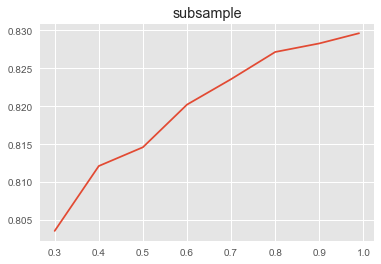

In [16]:
# Define parameters
param_subsample = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
params = {
    'subsample': param_subsample
}

# Grid Search with CV
cv_res, best_subsample = kt.score_grid(
    estimator = LGBMClassifier(
        boosting_type = 'rf',
        objective = 'binary',
        subsample_freq = 1,
        max_depth = 5,
        n_estimators = 2500,
        colsample_bytree = 1/3,
        # subsample = 0.75,
        # min_child_samples = ,
        # reg_alpha = ,
        # reg_lambda = ,
        random_state = 123,
        n_jobs = 3
    ),
    params = params,
    all_sets = new_sets,
    n_jobs = 3,
    verbose = True
)

## Iteration 5: Tune Min. Samples in Leaf

Computing test scores for min_child_samples = 1...Done!
Computing test scores for min_child_samples = 5...Done!
Computing test scores for min_child_samples = 10...Done!
Computing test scores for min_child_samples = 20...Done!
Computing test scores for min_child_samples = 30...Done!
Computing test scores for min_child_samples = 40...Done!
Computing test scores for min_child_samples = 50...Done!


[ RESULTS ]
   Best Score: 0.8311912566445624
Optimal Value: 1


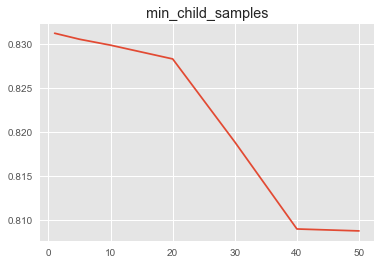

In [17]:
# Define parameters
param_min_leaf = [1,5,10,20,30,40,50]
params = {
    'min_child_samples': param_min_leaf
}

# Grid Search with CV
cv_res, best_min_leaf = kt.score_grid(
    estimator = LGBMClassifier(
        boosting_type = 'rf',
        objective = 'binary',
        subsample_freq = 1,
        max_depth = 5,
        n_estimators = 2500,
        colsample_bytree = 1/3,
        subsample = 0.9,
        # min_child_samples = ,
        # reg_alpha = ,
        # reg_lambda = ,
        random_state = 123,
        n_jobs = 3
    ),
    params = params,
    all_sets = new_sets,
    n_jobs = 3,
    verbose = True
)

## Iteration 6: Tune L1 Regularisation (Alpha)

Computing test scores for reg_alpha = 0...Done!
Computing test scores for reg_alpha = 0.1...Done!
Computing test scores for reg_alpha = 0.2...Done!
Computing test scores for reg_alpha = 0.3...Done!
Computing test scores for reg_alpha = 0.4...Done!
Computing test scores for reg_alpha = 0.5...Done!
Computing test scores for reg_alpha = 0.6...Done!
Computing test scores for reg_alpha = 0.7...Done!
Computing test scores for reg_alpha = 0.8...Done!
Computing test scores for reg_alpha = 0.9...Done!


[ RESULTS ]
   Best Score: 0.8302847910143568
Optimal Value: 0.6


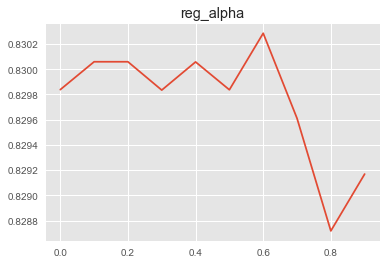

In [18]:
# Define parameters
param_alpha = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
params = {
    'reg_alpha': param_alpha
}

# Grid Search with CV
cv_res, best_alpha = kt.score_grid(
    estimator = LGBMClassifier(
        boosting_type = 'rf',
        objective = 'binary',
        subsample_freq = 1,
        max_depth = 5,
        n_estimators = 2500,
        colsample_bytree = 1/3,
        subsample = 0.9,
        min_child_samples = 10,
        # reg_alpha = ,
        # reg_lambda = ,
        random_state = 123,
        n_jobs = 3
    ),
    params = params,
    all_sets = new_sets,
    n_jobs = 3,
    verbose = True
)

## Iteration 7: Tune L2 Regularisation (Lambda)

Computing test scores for reg_lambda = 0...Done!
Computing test scores for reg_lambda = 0.1...Done!
Computing test scores for reg_lambda = 0.2...Done!
Computing test scores for reg_lambda = 0.3...Done!
Computing test scores for reg_lambda = 0.4...Done!
Computing test scores for reg_lambda = 0.5...Done!
Computing test scores for reg_lambda = 0.6...Done!
Computing test scores for reg_lambda = 0.7...Done!
Computing test scores for reg_lambda = 0.8...Done!
Computing test scores for reg_lambda = 0.9...Done!


[ RESULTS ]
   Best Score: 0.8302860464283296
Optimal Value: 0.1


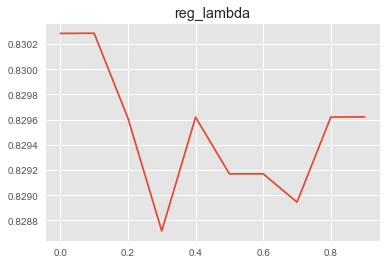

In [19]:
# Define parameters
param_lambda = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
params = {
    'reg_lambda': param_lambda
}

# Grid Search with CV
cv_res, best_lambda = kt.score_grid(
    estimator = LGBMClassifier(
        boosting_type = 'rf',
        objective = 'binary',
        subsample_freq = 1,
        max_depth = 5,
        n_estimators = 2500,
        colsample_bytree = 1/3,
        subsample = 0.9,
        min_child_samples = 10,
        reg_alpha = 0.6,
        # reg_lambda = ,
        random_state = 123,
        n_jobs = 3
    ),
    params = params,
    all_sets = new_sets,
    n_jobs = 3,
    verbose = True
)